#Investigation on the Most Significant Attributes/Statistics of an NFL Quarterback


## 1. Introduction

In the extremely competitive world of the NFL, the quarterback is a quintessential position when it comes to the success of a team in the league. They are responsible for controlling the entire offense of their team and often can be the reason for a team's result on any given week. This data science project will dive deep into the different attributes that contribute to a quarterback’s success in the NFL. By taking the time to analyze multiple comprehensive datasets that store detailed quarterback statistics from the years 2000 to 2022 wwe are able to explore what physical and performance based measurements correlate most strongly towards a successful NFL quarterback. This project is uniquely useful as it holds practical implications when it comes to both the scouting and training of future quarterback classes. Knowing the traits that are most important to professional success will allow teams to hone in on these specific attributes. They are able to scout players with the ideal physical attributes, such as height, while also training their quarterbacks to maximize their capabilities when it comes to learnable attributes, such as speed or arm strength. Obviously no player is unable to maximize all attributes so understanding which ones are the most important to weigh them accordingly while training and scouting is extremely crucial.


#2. Data Curation

The datasets used within this study are provided below:

https://www.kaggle.com/datasets/supremeleaf/nfl-qb-stats-1970-2022
https://www.kaggle.com/datasets/mitchellweg1/nfl-combine-results-dataset-2000-2022?rvi=1



In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Since the second data set filled with combine statistics starts from the year 2000, we will filter the QB Statistic dataset to also only show data post 2000. This way the two datasets are more parallel and ready to be merged.

In [ ]:
qb_df = pd.read_csv('NFL QB Stats.csv')
qb_df = qb_df[qb_df['Year'] >= 2000]
qb_df

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2000,Ray Lucas,206,5.0,41,21,51.2,0,4,26.1,10,24.4,2,0,30,6,24
1399,2000,Spergon Wynn,167,3.1,54,22,40.7,0,1,41.2,5,9.3,1,0,32,13,89
1400,2000,Rick Mirer,126,6.3,20,10,50.0,1,0,86.7,6,30.0,2,0,26,1,6
1401,2000,Jeff Lewis,120,3.8,32,16,50.0,0,1,46.4,6,18.8,0,0,16,7,51


Below I combine the combine data CSVs from 2000 to 2022. This way I have one dataframe with all of the players combine data from 2000-2022.

In [ ]:
file_paths = {
    '2000_combine.csv': 2000,
    '2001_combine.csv': 2001,
    '2002_combine.csv': 2002,
    '2003_combine.csv': 2003,
    '2004_combine.csv': 2004,
    '2005_combine.csv': 2005,
    '2006_combine.csv': 2006,
    '2007_combine.csv': 2007,
    '2008_combine.csv': 2008,
    '2009_combine.csv': 2009,
    '2010_combine.csv': 2010,
    '2011_combine.csv': 2011,
    '2012_combine.csv': 2012,
    '2013_combine.csv': 2013,
    '2014_combine.csv': 2014,
    '2015_combine.csv': 2015,
    '2016_combine.csv': 2016,
    '2017_combine.csv': 2017,
    '2018_combine.csv': 2018,
    '2019_combine.csv': 2019,
    '2020_combine.csv': 2020,
    '2021_combine.csv': 2021,
    '2022_combine.csv': 2022,
}

dfs = []

for file_path, year in file_paths.items():
    df = pd.read_csv(file_path)
    df['Year'] = year
    dfs.append(df)

combine_df = pd.concat(dfs, ignore_index=True)
combine_df

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
7675,Devonte Wyatt,DT,Georgia,6-3,304.0,4.77,29.0,NaN,111.0,NaN,NaN,2022
7676,Jalen Wydermyer,TE,Texas A&M,6-4,255.0,NaN,NaN,NaN,NaN,NaN,NaN,2022
7677,Cade York,K,LSU,6-1,206.0,NaN,NaN,12.0,NaN,NaN,NaN,2022
7678,Nick Zakelj,OT,Fordham,6-6,316.0,5.13,28.5,27.0,110.0,7.75,4.71,2022


Next, I merge the two dataframes so that I have one larger dataframe that contains the quarterback statistics as Ill as their combine statistics. I join the two dataframes on the Player column so they are aligned by name.

In [ ]:
df = pd.merge(qb_df, combine_df, on=['Player'], how='inner')
df

,Year_x,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,...,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year_y
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
1,2021,Patrick Mahomes,4839,7.4,658,436,66.3,37,13,98.4,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
2,2020,Patrick Mahomes,4740,8.1,588,390,66.3,38,6,108.2,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
3,2019,Patrick Mahomes,4031,8.3,484,319,65.9,26,5,105.3,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
4,2018,Patrick Mahomes,5097,8.8,580,383,66.0,50,12,113.8,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,2001,Travis Brown,201,6.1,33,15,45.4,1,2,50.2,...,New Mexico,6-2,202.0,4.49,30.0,13.0,120.0,7.18,4.38,2008
973,2003,Dave Ragone,135,3.4,40,20,50.0,0,1,47.4,...,Louisville,6-4,249.0,4.99,30.5,NaN,101.0,7.42,4.36,2003
974,2002,Randy Fasani,171,3.9,44,15,34.1,0,4,8.8,...,Stanford,6-3,224.0,4.77,31.5,NaN,106.0,6.75,3.87,2002
975,2001,Spergon Wynn,418,4.3,98,48,49.0,1,6,38.6,...,Texas State,6-3,229.0,4.91,34.0,NaN,108.0,7.71,4.59,2000


As you can see above their are several players that are not Quarterbacks within our dataset. This data is not useful to us and only makes the CSV more confusing to look at. Below I filter out all the non Quarterbacks so that only QBs are a part of the dataset.

In [ ]:
#Cleaning the data so its only QB's
df = df[df['Pos'] == 'QB']
df

,Year_x,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,...,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year_y
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
1,2021,Patrick Mahomes,4839,7.4,658,436,66.3,37,13,98.4,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
2,2020,Patrick Mahomes,4740,8.1,588,390,66.3,38,6,108.2,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
3,2019,Patrick Mahomes,4031,8.3,484,319,65.9,26,5,105.3,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
4,2018,Patrick Mahomes,5097,8.8,580,383,66.0,50,12,113.8,...,Texas Tech,6-2,225.0,4.80,30.0,NaN,114.0,6.88,4.08,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2001,Travis Brown,201,6.1,33,15,45.4,1,2,50.2,...,Northern Arizona,6-3,218.0,5.01,29.0,NaN,101.0,7.54,4.87,2000
973,2003,Dave Ragone,135,3.4,40,20,50.0,0,1,47.4,...,Louisville,6-4,249.0,4.99,30.5,NaN,101.0,7.42,4.36,2003
974,2002,Randy Fasani,171,3.9,44,15,34.1,0,4,8.8,...,Stanford,6-3,224.0,4.77,31.5,NaN,106.0,6.75,3.87,2002
975,2001,Spergon Wynn,418,4.3,98,48,49.0,1,6,38.6,...,Texas State,6-3,229.0,4.91,34.0,NaN,108.0,7.71,4.59,2000


Some of the data in the dataset is not actually useful. For example, the player's school is not relavent to their physical attributes or on field performance so it is remove it below.

In [ ]:
# Only keeping data we want
df = df[['Year_x', 'Pass Yds','Player', 'Yds/Att', 'Att', 'Cmp', 'Cmp %', 'TD', 'INT', 'Rate', 'Sck', 'Ht', 'Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'Year_y']]
df

,Year_x,Pass Yds,Player,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,Sck,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,Year_y
0,2022,5250,Patrick Mahomes,8.1,648,435,67.1,41,12,105.2,26,6-2,225.0,4.80,30.0,114.0,6.88,4.08,2017
1,2021,4839,Patrick Mahomes,7.4,658,436,66.3,37,13,98.4,28,6-2,225.0,4.80,30.0,114.0,6.88,4.08,2017
2,2020,4740,Patrick Mahomes,8.1,588,390,66.3,38,6,108.2,22,6-2,225.0,4.80,30.0,114.0,6.88,4.08,2017
3,2019,4031,Patrick Mahomes,8.3,484,319,65.9,26,5,105.3,17,6-2,225.0,4.80,30.0,114.0,6.88,4.08,2017
4,2018,5097,Patrick Mahomes,8.8,580,383,66.0,50,12,113.8,26,6-2,225.0,4.80,30.0,114.0,6.88,4.08,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2001,201,Travis Brown,6.1,33,15,45.4,1,2,50.2,1,6-3,218.0,5.01,29.0,101.0,7.54,4.87,2000
973,2003,135,Dave Ragone,3.4,40,20,50.0,0,1,47.4,8,6-4,249.0,4.99,30.5,101.0,7.42,4.36,2003
974,2002,171,Randy Fasani,3.9,44,15,34.1,0,4,8.8,7,6-3,224.0,4.77,31.5,106.0,6.75,3.87,2002
975,2001,418,Spergon Wynn,4.3,98,48,49.0,1,6,38.6,10,6-3,229.0,4.91,34.0,108.0,7.71,4.59,2000


Some players had statistics from multiple years. For these players we will only take their most recent year as we are trying to understand how these players turn out in the NFL in the end rather than validating early career discrepencies.

In [ ]:
# Deleting duplicates, using the most recent year
df = df.sort_values('Year_x', ascending=False).drop_duplicates('Player')
df

,Year_x,Pass Yds,Player,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,Sck,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,Year_y
0,2022,5250,Patrick Mahomes,8.1,648,435,67.1,41,12,105.2,26,6-2,225.0,4.80,30.0,114.0,6.88,4.08,2017
326,2022,108,Jeff Driskel,5.4,20,14,70.0,1,0,99.6,2,6-4,234.0,4.56,32.0,122.0,7.19,4.25,2016
272,2022,781,Bailey Zappe,8.5,92,65,70.6,5,3,100.9,6,6-1,215.0,4.88,30.0,109.0,7.19,4.40,2022
273,2022,780,Colt McCoy,5.9,132,90,68.2,1,3,76.6,13,6-1,216.0,4.79,NaN,114.0,NaN,NaN,2010
283,2022,708,Desmond Ridder,6.2,115,73,63.5,2,0,86.4,9,6-3,211.0,4.52,36.0,127.0,7.15,4.29,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2003,532,Jesse Palmer,4.6,116,60,51.7,3,4,58.6,16,6-2,231.0,4.78,35.5,112.0,7.13,4.29,2001
973,2003,135,Dave Ragone,3.4,40,20,50.0,0,1,47.4,8,6-4,249.0,4.99,30.5,101.0,7.42,4.36,2003
968,2003,391,Kurt Kittner,3.4,114,44,38.6,2,6,32.5,5,6-2,221.0,4.86,27.0,100.0,7.34,4.50,2002
974,2002,171,Randy Fasani,3.9,44,15,34.1,0,4,8.8,7,6-3,224.0,4.77,31.5,106.0,6.75,3.87,2002


Here I calculate the BMI using the height and weight of the players. We do this so that in the future we are able to use height and weight in a correlative manner in the same statistic.

In [ ]:
# adding BMI using height and weight
def conv_height(row):
  height = row['Ht']
  temp = height.split('-')
  inches = int(temp[0]) * 12 + int(temp[1])
  return inches

def bmi(row):
  height = row['Ht']
  weight = row['Wt']

  if height and weight:
    bmi = (int(weight) / (height * height)) * 703
  else:
    bmi = None

  return bmi

df['Ht'] = df.apply(conv_height, axis=1)
df['BMI'] = df.apply(bmi, axis=1)
df

,Year_x,Pass Yds,Player,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,Sck,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,Year_y,BMI
0,2022,5250,Patrick Mahomes,8.1,648,435,67.1,41,12,105.2,26,74,225.0,4.80,30.0,114.0,6.88,4.08,2017,28.885135
326,2022,108,Jeff Driskel,5.4,20,14,70.0,1,0,99.6,2,76,234.0,4.56,32.0,122.0,7.19,4.25,2016,28.480263
272,2022,781,Bailey Zappe,8.5,92,65,70.6,5,3,100.9,6,73,215.0,4.88,30.0,109.0,7.19,4.40,2022,28.362732
273,2022,780,Colt McCoy,5.9,132,90,68.2,1,3,76.6,13,73,216.0,4.79,NaN,114.0,NaN,NaN,2010,28.494652
283,2022,708,Desmond Ridder,6.2,115,73,63.5,2,0,86.4,9,75,211.0,4.52,36.0,127.0,7.15,4.29,2022,26.370311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2003,532,Jesse Palmer,4.6,116,60,51.7,3,4,58.6,16,74,231.0,4.78,35.5,112.0,7.13,4.29,2001,29.655405
973,2003,135,Dave Ragone,3.4,40,20,50.0,0,1,47.4,8,76,249.0,4.99,30.5,101.0,7.42,4.36,2003,30.305921
968,2003,391,Kurt Kittner,3.4,114,44,38.6,2,6,32.5,5,74,221.0,4.86,27.0,100.0,7.34,4.50,2002,28.371622
974,2002,171,Randy Fasani,3.9,44,15,34.1,0,4,8.8,7,75,224.0,4.77,31.5,106.0,6.75,3.87,2002,27.995022


In order to calculate years played to use in a future hypothesis test, I subtracted the year they entered the combine from the year their statistics were recorded. This will give the number of years they played in the league up until the statistics were recorded.

In [ ]:
# Adding years played

def years_played(row):
  played = int(row['Year_x']) - int(row['Year_y'])
  return played + 1

df['Years_played'] = df.apply(years_played, axis=1)
df

,Year_x,Pass Yds,Player,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,...,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,Year_y,BMI,Years_played
0,2022,5250,Patrick Mahomes,8.1,648,435,67.1,41,12,105.2,...,74,225.0,4.80,30.0,114.0,6.88,4.08,2017,28.885135,6
326,2022,108,Jeff Driskel,5.4,20,14,70.0,1,0,99.6,...,76,234.0,4.56,32.0,122.0,7.19,4.25,2016,28.480263,7
272,2022,781,Bailey Zappe,8.5,92,65,70.6,5,3,100.9,...,73,215.0,4.88,30.0,109.0,7.19,4.40,2022,28.362732,1
273,2022,780,Colt McCoy,5.9,132,90,68.2,1,3,76.6,...,73,216.0,4.79,NaN,114.0,NaN,NaN,2010,28.494652,13
283,2022,708,Desmond Ridder,6.2,115,73,63.5,2,0,86.4,...,75,211.0,4.52,36.0,127.0,7.15,4.29,2022,26.370311,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2003,532,Jesse Palmer,4.6,116,60,51.7,3,4,58.6,...,74,231.0,4.78,35.5,112.0,7.13,4.29,2001,29.655405,3
973,2003,135,Dave Ragone,3.4,40,20,50.0,0,1,47.4,...,76,249.0,4.99,30.5,101.0,7.42,4.36,2003,30.305921,1
968,2003,391,Kurt Kittner,3.4,114,44,38.6,2,6,32.5,...,74,221.0,4.86,27.0,100.0,7.34,4.50,2002,28.371622,2
974,2002,171,Randy Fasani,3.9,44,15,34.1,0,4,8.8,...,75,224.0,4.77,31.5,106.0,6.75,3.87,2002,27.995022,1


#3. Exploratory Data Analysis

Below is the calculation for the standard deviation and mean of the BMI for these quarterbacks. As you can see, the standard deviation is extremely low meaning that their BMIs are close to each other and do not have much variability. This helps us conclude that as a Quarterback your BMI should likely lie between 27 and 29.5 as this entails the physique necessary to compete with high level players. One reason for this is that at such a bmi one will be less injury prone making them more successful. In football one's ability to withstand the force of a hit is crucial so physicque and build is also essential to the sport. One idea could be to see how BMI correlates to QB rating. However, knowing that the BMIs do not have much variability tells us that checking this correlation does not provide us much information as the values are extremely dense at one spot. This means that once a player qualifies for the NFL all of their BMIs are already extremely similar.

Standard Deviation: 1.1154994462713417
Standard Deviation: 27.97079054206498


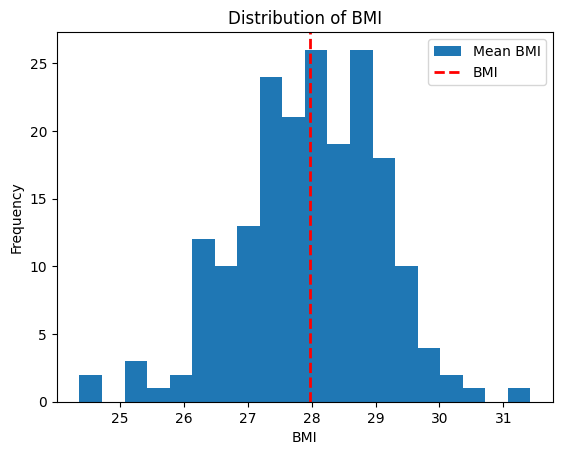

In [ ]:
std_bmi = df['BMI'].std()
mean_bmi = df['BMI'].mean()

df['BMI'].plot.hist(bins=20)

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.axvline(mean_bmi, color='r', linestyle='dashed', linewidth=2)

plt.legend(['Mean BMI', 'BMI'])

print('Standard Deviation: ' + str(std_bmi))
print('Standard Deviation: ' + str(mean_bmi))

Two correlations that I suspect are between number of years played with quarterback rating and years played with passing yards. In order to conduct the hypothesis tests for these relations we use a pearson test as shown below. After doing this we have graphed both correlations onto their respective scatterplots also shown below. After conducting the pearson tests we see that both p values are well below .05 which is the alpha value. This means we should reject both null hypotheses. Therefore we can conclude that the amount of years a quarterback has played is correlated to both their quarterback rating as well as their passing yards.

P Value for Years Played and Passer Rating:  4.389402061473904e-05
P Value for Years Played and Passer Rating:  0.00016117185699347352
Correlation Coefficient for Years Played and Passer Rating:  0.2882214864197013
Correlation Coefficient for Years Played and Passing Yards:  0.26699867090769136


Text(0, 0.5, 'Passing Yards')

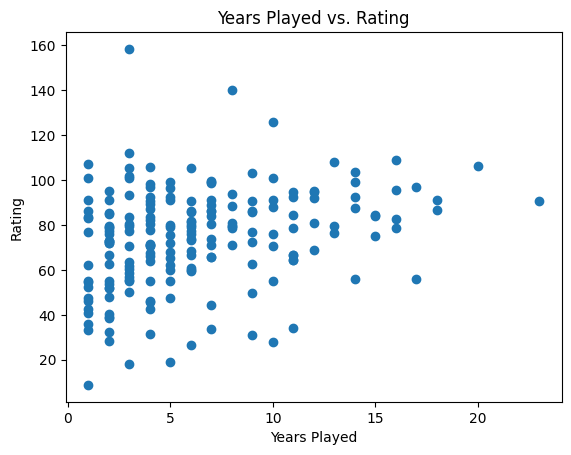

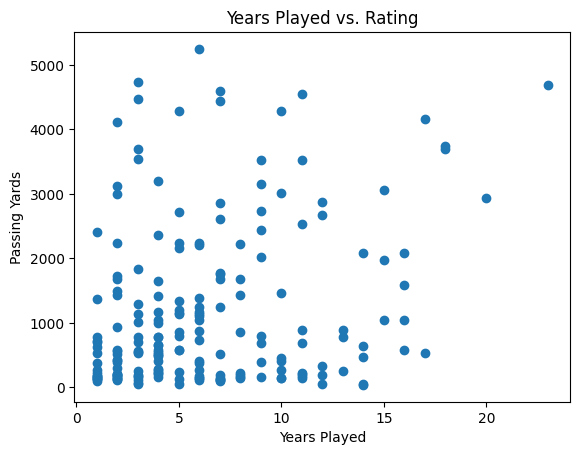

In [ ]:
correlation_coefficient_1, p_value_1 = stats.pearsonr(df['Years_played'], df['Rate'])
correlation_coefficient_2, p_value_2 = stats.pearsonr(df['Years_played'], df['Pass Yds'])


print("P Value for Years Played and Passer Rating: ", p_value_1)
print("P Value for Years Played and Passer Rating: ", p_value_2)

print("Correlation Coefficient for Years Played and Passer Rating: ", correlation_coefficient_1)
print("Correlation Coefficient for Years Played and Passing Yards: ", correlation_coefficient_2)


plt.scatter(df['Years_played'], df['Rate'])
plt.title('Years Played vs. Rating')
plt.xlabel('Years Played')
plt.ylabel('Rating')

plt.figure()
plt.scatter(df['Years_played'], df['Pass Yds'])
plt.title('Years Played vs. Rating')
plt.xlabel('Years Played')
plt.ylabel('Passing Yards')


Now, I want to analyze if 40 yard dash speeds have an impact on number sacks taken. In order to do this I will categorize the 40 yard dash data into fast, slow, and medium run times. I have done this by taking the 33rd and 66th percentiles of the 40 yard dash data distribution. Then I categorized 0-33 as fast, as these are the lower/quicker times. 33-66 will be classified as medium, and 66-99 will be categorized as slow. I do the same thing for the sack data to make both points categorical. After this I have used a chi squared test in order to calculate the p value to see if the 40 yd dash times do have a correlation to number of sacks taken. The P value resulted in .32. This is higher than our alpha value of .05 therefore we fail to reject the null hypothesis that 40 yd dash times have a correlation to number of sacks taken. However, I believe that categorizing the data and using a chi squared test is not the ideal method for these two quantative data points. Therefore, I used another pearson test to test the relation of these two points. This resulted in a p value of .004 meaning we can reject the null hypothesis.



0.32149024337814336
0.004917066392362033


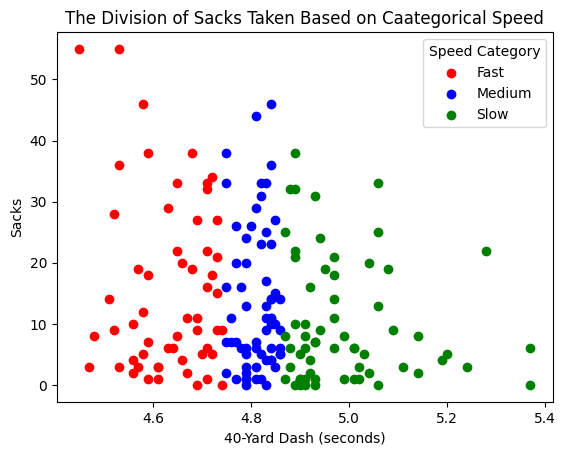

In [ ]:
# compare 40 yard dash

df_40 = df[df['40yd'].notna()]
df_40 = df_40[df_40['Sck'].notna()]


low_cutoff = np.percentile(df_40['40yd'], 33)
high_cutoff = np.percentile(df_40['40yd'], 66)

def category_40_yd(row):
  time = row['40yd']

  if time < low_cutoff:
    return 'Fast'
  elif time > high_cutoff:
    return 'Slow'
  else:
    return 'Medium'

df_40['cat_40'] = df_40.apply(category_40_yd, axis=1)


low_cutoff2 = np.percentile(df_40['Sck'], 33)
high_cutoff2 = np.percentile(df_40['Sck'], 66)

def category_sck(row):
  amt = row['Sck']

  if amt < low_cutoff2:
    return 'Low'
  elif amt > high_cutoff2:
    return 'High'
  else:
    return 'Medium'

df_40['cat_Sck'] = df_40.apply(category_sck, axis=1)


table = pd.crosstab(df_40['cat_40'], df_40['cat_Sck'])
chi_sq_p = (stats.chi2_contingency(table))[1]

correlation_coefficient_3, pearson_p = stats.pearsonr(df_40['40yd'], df_40['Sck'])

print(chi_sq_p)
print(pearson_p)

plt.scatter(df_40[df_40['cat_40'] == 'Fast']['40yd'], df_40[df_40['cat_40'] == 'Fast']['Sck'], color='r', label='Fast')
plt.scatter(df_40[df_40['cat_40'] == 'Medium']['40yd'], df_40[df_40['cat_40'] == 'Medium']['Sck'], color='b', label='Medium')
plt.scatter(df_40[df_40['cat_40'] == 'Slow']['40yd'], df_40[df_40['cat_40'] == 'Slow']['Sck'], color='g', label='Slow')

plt.title('The Division of Sacks Taken Based on Caategorical Speed')
plt.xlabel('40-Yard Dash (seconds)')
plt.ylabel('Sacks')
plt.legend(title='Speed Category')

Overall my analysis has shown that there are several things quarterbacks must have mastery in to be successful. These include making sure that they are physically in shape, having longevity, and maintaining high agility levels. A quarterback must make sure they lie within the optimal BMI range so that they are able to prevent injury and keep up with the high intensity of the sport. Having a thinner fragile frame can be costly to a player's health. Additionally, the tests have shown the longer a player plays the better rating and passing yards they achieve. This shows that longevity is crucial to improving at the game. This makes sense as the best way to get better is to play actual games against high level players. Furthermore, the 40 yard dash is a test of speed, quickness, and agility. These are all crucial to the game of football as shown in our final hypothesis test. Evading defenders and avoiding sacks is essential to a quarterback and our test has shown that speed and agility are the key to being able to do this.

I plan on using a regression technique for primary analysis. Our data is almost entirely quantitative making regression the most suitable method of analysis. These relationships can be easily graphed and interpreted visually. Additionally, this method allows me to account for the fact that we have several different independent variables as we can set up regression models for each relationship and analyze them. A regression model will also allow me to adjust for confounding variables as we can isolate the independent variables.

The key features of the dataset are measurements of physicality, years played, and agility. I was able to test all of these things against the productivity of the quarterbacks so that we understand what allows these quarterbacks to succeed. Testing these variables against the productivity variables using a regression technique allows me to build further conclusions about our data. This, in turn, allows me to build and train a model that can be used as a predictive measure for incoming quarterbacks or quarterback training methods.



##Primary Analysis
In order to select which machine learning technique to use we must look at the type of data that we are working with. I will choose to do regression on this data. The exploratory analysis revealed possible correlations with longevity, performance measurements, and physical attributes with success. I must also choose an overall metric for success to do regression and represent our Y value. A good measurement to use here is touchdowns scored by the quarterback. This is because statistics like passing yards or completions can be skewed. If a quarterback throws 10 completions and then an interception, the 10 previous completions were useless as no points were scored out of them. In the same way if a quarter moves the ball 60 yards down the field and then throws an interception then the 60 yards became pointless as they did not get points out of them. For this reason we should focus on touchdowns scored.

The reasons for using regression to do our primary analysis are the following.



1.   Quantitative Relationships: Mainly the variables we are analyzing are all quantitative. These include passing yards, quarterback rating, BMI, years played, etc. These are  all continuous, making regression a very good fit for exploring possible correlations between them.
2.   Multiple Independent Variables: Regression analysis allows us to accommodate for multiple covariates. This helps us isolate the effects of each of these variables and see what influences the outcome variable the most. In this case we will be able to deeply analyze which independent variable leads to the most touchdowns.
3. Predictive Quantitative Indicators: The primary goal of this investigation is to be predictive for training and scouting teams. Using regression will allow us to predict outcomes of success which is essential for these parts of professional organizations.


Hypothesis:
Metrics such as 40 yard dash times, completion percentage, passing yards, yards per attempt, and a negative interpretation of interceptions will show a correlation to more touchdown completions for NFL quarterbacks.










In [ ]:
df = df.dropna(subset = ['INT','Years_played', 'Cmp %', 'TD', 'Pass Yds', 'Rate', 'Cmp', 'Ht', '40yd', 'Yds/Att'])
features = ['INT','Cmp %', 'Rate', 'Pass Yds', 'Cmp', 'Years_played', 'Ht', '40yd', 'Yds/Att']
X = df[features]
y = df['TD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

coefs = model.coef_

for i in range(len(features)):
    print(str(features[i]) + ":" + str(coefs[i]))

print(f"Mean Squared Error: " + str(mse))
print(f"R^2 Score: " + str(r2))

INT:-0.3026309030459919
Cmp %:0.15260032467971918
Rate:0.7050133299922403
Pass Yds:14.287648980820084
Cmp:-6.4192046558080555
Years_played:0.08413974040402283
Ht:-0.15724700217914814
40yd:-0.16328574522111783
Yds/Att:-0.6540483156498063
Mean Squared Error: 8.292866463833786
R^2 Score: 0.8953608041864359


##Visualization
In order to visualize our NFL quarterback data analysis we will use several scatter plots and display the regression lines generated for these plots. This will communicate the findings from our primary analysis efficiently as we used regression to make predictions. I will be plotting the graphs listed below.

1.   The Correlation Between Passing Yards and Touchdowns

This plot will display the relationship between the number of passing yards a quarterback has achieved and the number of touchdowns they scored.
The x axis will be the number of passing yards while the y axis will be the number of touchdowns they scored.

2. The Correlation Between Completions and Touchdowns

This plot will display the relationship between the number of completions a quarterback has achieved and the number of touchdowns they scored.
The x axis will be the number of passing yards while the y axis will be the number of touchdowns they scored.

3. The Correlation Between Completion Percentage and Touchdowns

This plot will display the relationship between the completion percentage a quarterback has achieved and the number of touchdowns they scored.
The x axis will be the number of passing yards while the y axis will be the number of touchdowns they scored.

4. The Correlation Between Quarterback Rating and Touchdowns

This plot will display the relationship between the achieved quarterback rating and the number of touchdowns they scored.
The x axis will be the quarterback rating while the y axis will be the number of touchdowns they scored.


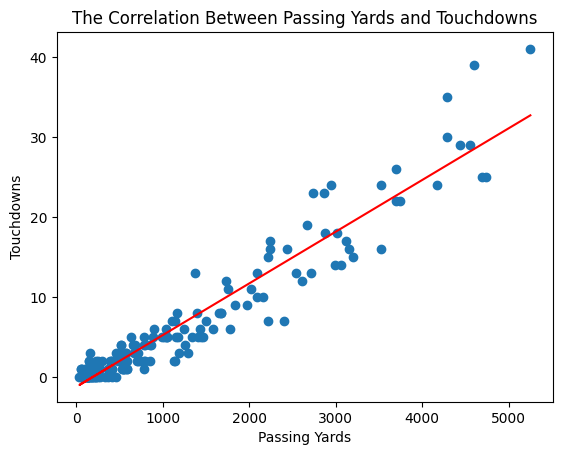

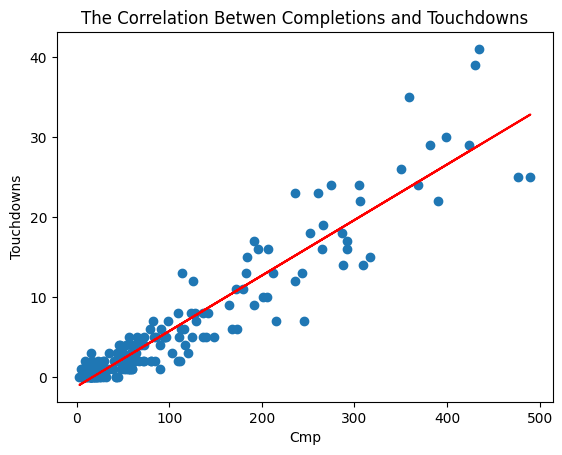

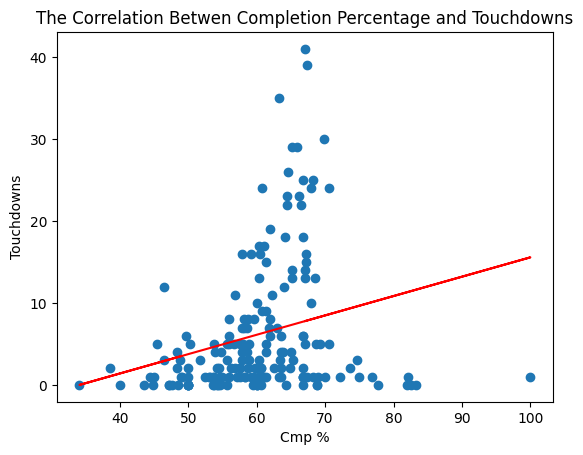

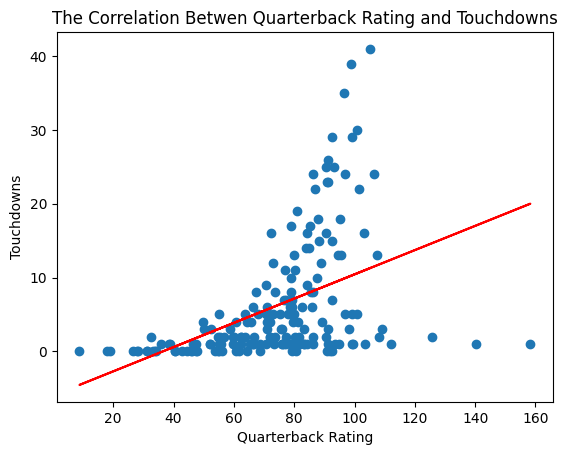

In [ ]:
plt.scatter(df['Pass Yds'], df['TD'])
plt.title('The Correlation Between Passing Yards and Touchdowns')
plt.xlabel('Passing Yards')
plt.ylabel('Touchdowns')
m, b = np.polyfit(df['Pass Yds'], df['TD'], 1)
plt.plot(df['Pass Yds'], m*df['Pass Yds'] + b, color = 'r')
plt.show()

plt.scatter(df['Cmp'], df['TD'])
plt.title('The Correlation Betwen Completions and Touchdowns')
plt.xlabel('Cmp')
plt.ylabel('Touchdowns')
m, b = np.polyfit(df['Cmp'], df['TD'], 1)
plt.plot(df['Cmp'], m*df['Cmp'] + b, color='r')
plt.show()

plt.scatter(df['Cmp %'], df['TD'])
plt.title('The Correlation Betwen Completion Percentage and Touchdowns')
plt.xlabel('Cmp %')
plt.ylabel('Touchdowns')
m, b = np.polyfit(df['Cmp %'], df['TD'], 1)
plt.plot(df['Cmp %'], m*df['Cmp %'] + b, color = 'r')
plt.show()

plt.scatter(df['Rate'], df['TD'])
plt.title('The Correlation Betwen Quarterback Rating and Touchdowns')
plt.xlabel('Quarterback Rating')
plt.ylabel('Touchdowns')
m, b = np.polyfit(df['Rate'], df['TD'], 1)
plt.plot(df['Rate'], m*df['Rate'] + b, color='r')
plt.show()

Using these graphs we can compare the level of impact between these independent variables. From the primary analysis, we know that there is a strong correlation between passing yards & touchdowns completions & touchdowns. However, there was much less correlation between quarterback rating and touchdowns. We also saw less correlation between completion percentage and touchdowns. Nonetheless passing yards was clearly the most impactful when it came to the number of touchdowns a quarterback scored.

1.   The Correlation Between Passing Yards and Years Played

This plot will display the relationship between the number of passing yards a quarterback has achieved and the number of years they played.
The x axis will be the number of passing yards while the y axis will be the number of years they played.

2. The Correlation Between Completions and Years Played

This plot will display the relationship between the number of completions a quarterback has achieved and the number of years they played.
The x axis will be the number of passing yards while the y axis will be the number of years they played.

3. The Correlation Between Completion Percentage and Years Played

This plot will display the relationship between the completion percentage a quarterback has achieved and the number of years they played.
The x axis will be the number of passing yards while the y axis will be the number of years they played.

4. The Correlation Between Quarterback Rating and Years Played

This plot will display the relationship between the achieved quarterback rating and the number of years they played.
The x axis will be the quarterback rating while the y axis will be number of years they played.


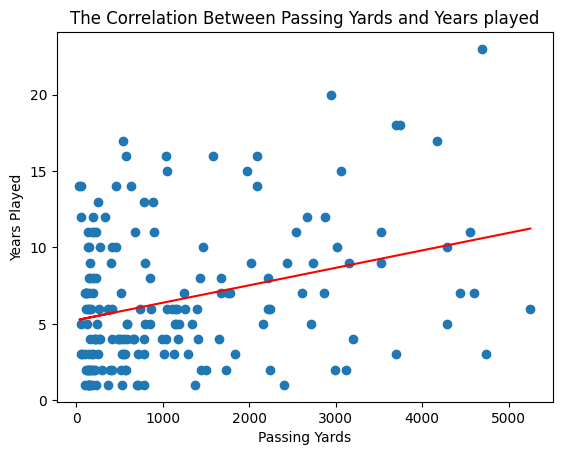

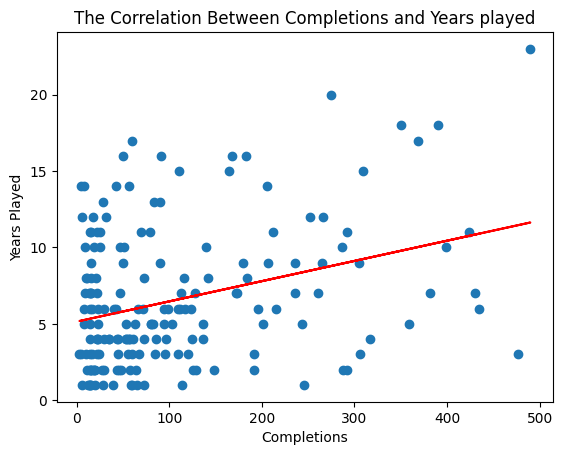

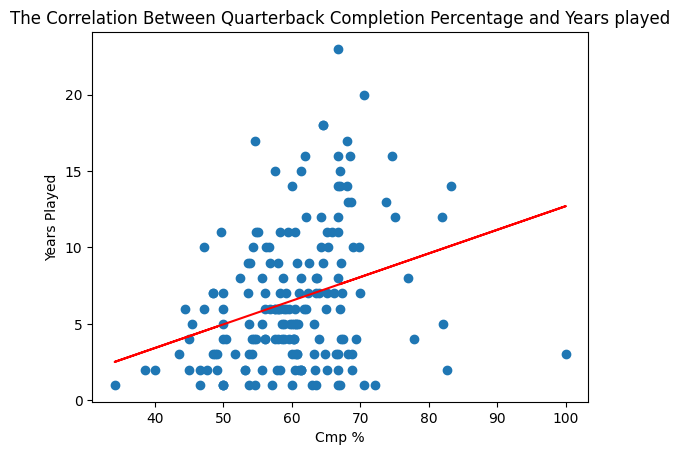

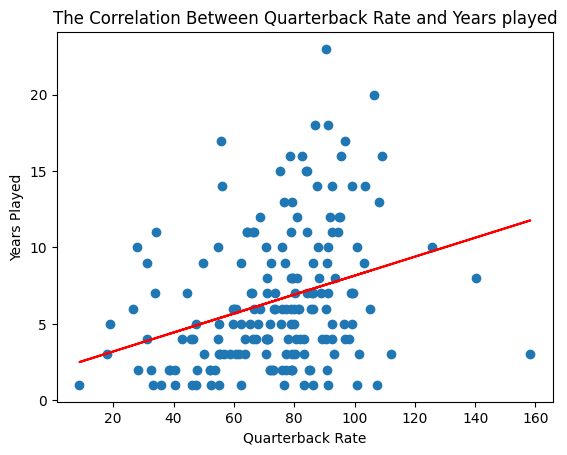

In [ ]:
plt.scatter(df['Pass Yds'], df['Years_played'])
plt.title('The Correlation Between Passing Yards and Years played')
plt.xlabel('Passing Yards')
plt.ylabel('Years Played')
m, b = np.polyfit(df['Pass Yds'], df['Years_played'], 1)
plt.plot(df['Pass Yds'], m*df['Pass Yds'] + b, color = 'r')
plt.show()

plt.scatter(df['Cmp'], df['Years_played'])
plt.title('The Correlation Between Completions and Years played')
plt.xlabel('Completions')
plt.ylabel('Years Played')
m, b = np.polyfit(df['Cmp'], df['Years_played'], 1)
plt.plot(df['Cmp'], m*df['Cmp'] + b, color = 'r')
plt.show()

plt.scatter(df['Cmp %'], df['Years_played'])
plt.title('The Correlation Between Quarterback Completion Percentage and Years played')
plt.xlabel('Cmp %')
plt.ylabel('Years Played')
m, b = np.polyfit(df['Cmp %'], df['Years_played'], 1)
plt.plot(df['Cmp %'], m*df['Cmp %'] + b, color = 'r')
plt.show()


plt.scatter(df['Rate'], df['Years_played'])
plt.title('The Correlation Between Quarterback Rate and Years played')
plt.xlabel('Quarterback Rate')
plt.ylabel('Years Played')
m, b = np.polyfit(df['Rate'], df['Years_played'], 1)
plt.plot(df['Rate'], m*df['Rate'] + b, color = 'r')
plt.show()


As we can see within these graphs, using years played as a success metric does not provide us a strong of relationships as touchdowns did. There is a very clear reason for this. It is due to the concept of backup quarterbacks. Backup QBs do not see the field as often and are proven to not be as good s starters. However, they may still be good enough to staay within the league. Because of this they still have a solid amount of years played; however, the statistics they put up otherwise are not as good.

##Insights and Conclusions

This project is centered around discovering insights on essential attributes of a quarterback’s success. For those who do not have a football background whatsoever, this study can introduce the importance of the quarterback to the spot. Additionally it will present to them the performance statistics and physical traits that are the most essential to a quarterback’s career. The analysis will leave an uninformed reader with a good understanding of the traits that make a quarterback successful in the NFL.
For readers of the study that are already familiar with football and how important  quarterbacking is, this project allows them to indulge in a deeper, more analytical perspective on quarterback statistics. The study confirms already existing assumptions such as the importance of passing yards and completions, but also discusses factors like BMI and 40 yard dash.

Key Takeaways from this Analysis:
1. Our findings show that certain physical attributes, specifically BMI, are overall uniform throughout all NFL quarterbacks. This can be good for scouts as they will know what the build of an NFL quarterback is truly like. In terms of training since all NFL quarterbacks are around the same BMI it does not help as much as they come into the league with this already intact. Speed on the other hand is relatively important to the success of a quarterback. This is because for faster quarterbacks they are able to avoid far more sacks. The ability to avoid defenders allows quarterbacks to extend plays and progress down the field.
2. The data also shows a positive correlation between the number of years played and quarterback rating/passing yards. This indicates that the more years a quarterback plays the better they get over time. This makes a lot of sense as this is true about most things, not just quarterbacking.
Using regression to analyze this data has allowed us to quantify performance metrics on the number of touchdowns scored by any given quarterback. Our model has shown clear direct influences with a decently high R^2 of .89.
3. Additionally, a relatively low MSE of roughly 8 has also shown our model is reasonably accurate. We found that passing yards and completions to be extremely predictive on scoring ability over factors like completion percentage and quarterback rating.
4. By using scatter plots and regression lines we have been able to interpret performance metrics on both number of touchdowns and number of years played. By doing this we see trends that much better fit towards the number of touchdowns scored.
5. The study has shown us that both moderately decent quarterbacks and star quarterbacks can have long careers. This shows us the overall importance of durability and consistency over time being played.

This project has informed all readers, both uninformed and informed, about the importance of quarterback statistics. It has also shown the tools that should be used for continued investigation. We have demonstrated that the application of these strategies can successfully be applied to scouting and training processes at the professional level. These important insights can help teams make good decisions when it comes to both drafting and developing existing quarterbacks. This study is informative to people like us who are curious about statistics like these but also opens the door to professionals to do even deeper investigation into player development and success.
In conclusion, whether new to football or an existing analyst, people who dive deep into this project will gain a structured and statistical understanding of which performance metrics and physical attributes are most essential to the position. This information is crucial to fans, analysts, and team coaching staffs that are trying to maximize the performance of their young quarterbacks.







#Biblography

##Data Sources
[https://www.kaggle.com/datasets/supremeleaf/nfl-qb-stats-1970-2022](https://www.kaggle.com/datasets/supremeleaf/nfl-qb-stats-1970-2022)
[https://www.kaggle.com/datasets/mitchellweg1/nfl-combine-results-dataset-2000-2022?rvi=1](https://www.kaggle.com/datasets/mitchellweg1/nfl-combine-results-dataset-2000-2022?rvi=1)


##Helpful Links
[https://operations.nfl.com/journey-to-the-nfl/the-next-generation-of-nfl-stars/nfl-scouting-combine/](https://operations.nfl.com/journey-to-the-nfl/the-next-generation-of-nfl-stars/nfl-scouting-combine/)
[https://operations.nfl.com/learn-the-game/nfl-basics/rookies-guide/](https://operations.nfl.com/learn-the-game/nfl-basics/rookies-guide/)
[https://throwdeeppublishing.com/blogs/football-glossary/what-is-a-quarterback-in-football](https://throwdeeppublishing.com/blogs/football-glossary/what-is-a-quarterback-in-football)
[https://www.nfl.com/news/being-a-qb-isn-t-easy-but-the-very-best-share-some-common-trait-09000d5d812366da](https://www.nfl.com/news/being-a-qb-isn-t-easy-but-the-very-best-share-some-common-trait-09000d5d812366da)
[https://operations.nfl.com/gameday/analytics/big-data-bowl/](https://operations.nfl.com/gameday/analytics/big-data-bowl/
)



